In [1]:
import pandas as pd
import pylab as pl
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mnpluto = pd.read_csv("MN.csv")
bkpluto = pd.read_csv("BK.csv")
bxpluto = pd.read_csv("BX.csv")
qnpluto = pd.read_csv("QN.csv")
sipluto = pd.read_csv("SI.csv")
law84 = pd.read_csv("waterandenergy.csv")

/Users/juansokoloff/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,22,23,25,63,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/juansokoloff/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,19,21,22,23,24,25,63,64,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/juansokoloff/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,19,21,22,63,64,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/juansokoloff/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,19,21,22,63,64,76) have mixe

In [3]:
data = pd.concat([mnpluto, bkpluto, bxpluto, qnpluto, sipluto])

In [4]:
df = pd.merge(data, law84, right_on="NYC Borough, Block and Lot (BBL)", left_on="BBL")

In [5]:
df1 = df[["Borough_x", 'XCoord', 'YCoord','Address', "ENERGY STAR Score", "CD","ZipCode", "LandUse", "LotArea", "NumBldgs", "NumFloors", "UnitsTotal", "Ext","AssessTot","YearBuilt","BoroCode","BBL","TaxMap",'NYC Borough, Block and Lot (BBL)','Reported NYC Building Identification Numbers (BINs)','Property Name','Zip Code','Primary Property Type - Self Selected','Year Built','Occupancy','Metered Areas (Energy)','Weather Normalized Site EUI (kBtu/ft_)','Weather Normalized Site Electricity Intensity (kWh/ft_)','Weather Normalized Site Natural Gas Intensity (therms/ft_)','Source EUI (kBtu/ft_)','Weather Normalized Source EUI (kBtu/ft_)','Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)','Fuel Oil #4 Use (kBtu)','Fuel Oil #5 & 6 Use (kBtu)','Diesel #2 Use (kBtu)','District Steam Use (kBtu)', 'Natural Gas Use (kBtu)','Weather Normalized Site Natural Gas Use (therms)', 'Electricity Use - Grid Purchase (kBtu)', 'Weather Normalized Site Electricity (kWh)','Total GHG Emissions (Metric Tons CO2e)','Direct GHG Emissions (Metric Tons CO2e)', 'Indirect GHG Emissions (Metric Tons CO2e)']]


In [6]:
df1 = df1[df1["NumBldgs"]<100]
df1 = df1[df1["UnitsTotal"]<1000]
df1 = df1[df1["Total GHG Emissions (Metric Tons CO2e)"]<10e+06]
df1 = df1[df1["Direct GHG Emissions (Metric Tons CO2e)"]<500000]
df1 = df1[df1["Direct GHG Emissions (Metric Tons CO2e)"]>0]
df1 = df1[df1["Natural Gas Use (kBtu)"]>0]
df1 = df1[df1["Natural Gas Use (kBtu)"]>0]
df1 = df1[df1["YearBuilt"]>1800]

In [8]:
df1.rename(columns = {'Total GHG Emissions (Metric Tons CO2e)':"Total_GHG_Emissions"}, inplace = True)
df1.rename(columns = {'Natural Gas Use (kBtu)':"Natural_Gas_Use"}, inplace = True)
df1.rename(columns = {'Source EUI (kBtu/ft_)':"Source_EUI"}, inplace = True)
df1.rename(columns = {'ENERGY STAR Score':"Energy_star_score"}, inplace = True)

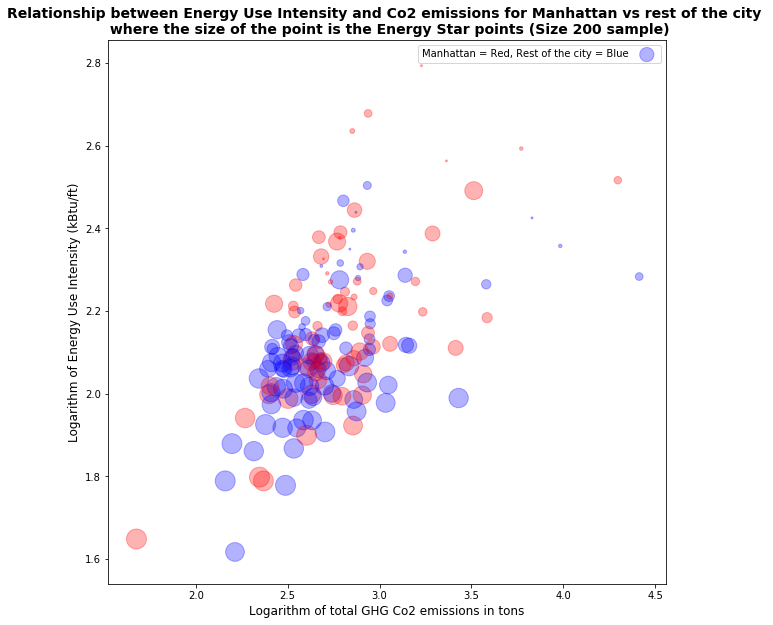

In [26]:
np.random.seed(90)

fig=figsize(10,10)

sample1000 = df1.sample(200)

colors = {1:"r", 2:"b", 3:"b", 4:"b", 5:"b"}

sample1000["colorcito"] = sample1000["BoroCode"].map(colors)

s = [((4*(sample1000["Energy_star_score"]))) for n in range(len(sample1000["Energy_star_score"]))]

pl.scatter(log10(sample1000["Total_GHG_Emissions"]), log10(sample1000["Source_EUI"]), s=s, c=sample1000["colorcito"], alpha=0.3);

plt.xlabel("Logarithm of total GHG Co2 emissions in tons", fontsize=12)
plt.ylabel("Logarithm of Energy Use Intensity (kBtu/ft)", fontsize=12)
Legend = ["Manhattan = Red," " Rest of the city = Blue"]
plt.legend(Legend, markerfirst=False)
plt.title("Relationship between Energy Use Intensity and Co2 emissions for Manhattan vs rest of the city \n where the size of the point is the Energy Star points (Size 200 sample)", weight='bold', fontsize=14)

Plot made using the energy consumption data, provided by the NY Local Law 84 benchmarking information

In the previous graph we can see 4 dimensions plotted, in the X and Y axxis we have the Log of the total Co2 emissions by building and in the Y axxis we have the Logarithm of the Energy Use Intensity. The Colors in the graph represent if the building is located in Manhattan (Red) or in another Borough (Blue) and the size of the point represents the Energy Star Points that that specific building receives.

As expected the more energy consuming buildings have a smaller Energy Star Points in comparisson to the less energy consuming buildings. Regarding the Boro there is not a clear pattern. And of course there seems to be some positive correlation between the GHG Co2 emissions and the Energy Use Intensity.

It is also important to mention that the graph was made using a random sample for 200 buildings in new york after merging Pluto Data and the Local Law 84 for NYC. And performing some data cleaning.